## Classification Model using Naive Bayes                


### Student Details
##### A005 - Saurabh Chaudhari
##### A006 - Bharvi Chavda
##### A029 - Ruchika Gangadhar Karoo

**Overview**

+ Dataset: Salaray Dataset
+ Goal: Predict the salary range of individuals
+ Feature Variables:- 
    - age -- age of a person
    - workclass	-- A work class is a grouping of work 
    - education	-- Education of an individuals	
    - maritalstatus -- Marital status of an individulas	
    - occupation	 -- occupation of an individuals
    - relationship -- relationship stage of an individual
    - race --  Race of an Individual
    - sex --  Gender of an Individual
    - capitalgain --  profit received from the sale of an investment	
    - capitalloss	-- A decrease in the value of a capital asset
    - hoursperweek -- number of hours work per week	
    - native -- Native of an individual
+ Target Variable: Salary


**Workflow**

+ EDA & Feature Engineering:-
    - Droping Duplicates
    - Encoding categorical variables
    - Imbalance dataset :- ADASYN
    - Feature Selection :- ExtraTreesClassifier
    - Summary Statistics
    - Standardisation 
+ Model Building
    - Navie Bayes    
+ Model Evaluation

In [111]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [112]:
# Loading train set
df_train=pd.read_csv('SalaryData_Train.csv.crdownload')
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [113]:
# Loading test set
df_test=pd.read_csv('SalaryData_Test.csv')
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [114]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18039 entries, 0 to 18038
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            18039 non-null  int64 
 1   workclass      18039 non-null  object
 2   education      18039 non-null  object
 3   educationno    18039 non-null  int64 
 4   maritalstatus  18039 non-null  object
 5   occupation     18039 non-null  object
 6   relationship   18039 non-null  object
 7   race           18039 non-null  object
 8   sex            18039 non-null  object
 9   capitalgain    18039 non-null  int64 
 10  capitalloss    18039 non-null  int64 
 11  hoursperweek   18039 non-null  int64 
 12  native         18039 non-null  object
 13  Salary         18039 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.9+ MB


In [115]:
df_train['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

Droping Duplicates

In [116]:
print('Shape of train dataframe before dropping duplicates',df_train.shape)
print('Shape of test dataframe before dropping duplicates',df_test.shape)

Shape of train dataframe before dropping duplicates (18039, 14)
Shape of test dataframe before dropping duplicates (15060, 14)


In [117]:
df_train.drop_duplicates(keep=False,inplace=True)

In [118]:
df_test.drop_duplicates(keep=False,inplace=True)

In [119]:
print('Shape of train dataframe after dropping duplicates',df_train.shape)
print('Shape of test dataframe after dropping duplicates',df_test.shape)

Shape of train dataframe after dropping duplicates (15714, 14)
Shape of test dataframe after dropping duplicates (13450, 14)


Droping 'Native' column since all the native is US

In [120]:
df_train.drop('native',axis=1,inplace=True)

In [121]:
df_test.drop('native',axis=1,inplace=True)

In [122]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K


Label Encoding Categorical Columns of train and test dataset

In [123]:
from sklearn import preprocessing

# Making a list of categorical columns
cols = [var for var in df_train.columns if df_train[var].dtype=='object']
#cols=['workclass','education','maritalstatus','occupation','relationship','race','sex','Salary']  

le=preprocessing.LabelEncoder()
for col in cols:
    df_train[col]=le.fit_transform(df_train[col])
    df_test[col]=le.fit_transform(df_test[col])
    print(le.classes_)

[' Federal-gov' ' Local-gov' ' Private' ' Self-emp-inc'
 ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'
 ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college']
[' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed']
[' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']
[' Husband' ' Not-in-family' ' Other-relative' ' Own-child' ' Unmarried'
 ' Wife']
[' Amer-Indian-Eskimo' ' Asian-Pac-Islander' ' Black' ' Other' ' White']
[' Female' ' Male']
[' <=50K' ' >50K']


In [124]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,0
1,50,4,9,13,2,3,0,4,1,0,0,13,0
2,38,2,11,9,0,5,1,4,1,0,0,40,0
3,53,2,1,7,2,5,0,2,1,0,0,40,0
4,28,2,9,13,2,9,5,2,0,0,0,40,0


In [125]:
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,0
1,38,2,11,9,2,4,0,4,1,0,0,50,0
2,28,1,7,12,2,10,0,4,1,0,0,40,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,1
4,34,2,0,6,4,7,1,4,1,0,0,30,0


Checking if the data is IMBALANCED 

In [126]:
## Checking output column of train dataset
cnt = pd.DataFrame(df_train['Salary'].value_counts())
cnt

,Salary
0,11732
1,3982


In [127]:
print("Percent of data labelled as 0:",((df_train['Salary']==0).sum()/len(df_train)*100))
print("Percent of data labelled as 1:",((df_train['Salary']==1).sum()/len(df_train)*100))

Percent of data labelled as 0: 74.65953926435026
Percent of data labelled as 1: 25.34046073564974


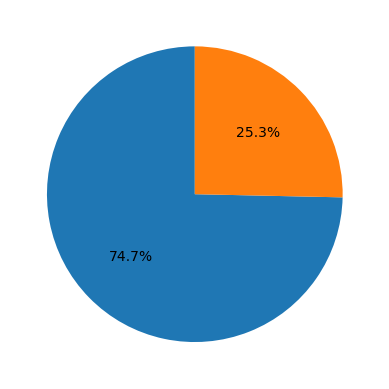

In [128]:
plt.pie(cnt.Salary, autopct='%1.1f%%', startangle=90)
# Display the pie chart
plt.show()

The dataset is highly imbalanced

In [129]:
x=df_train.iloc[:,:-1]
y=df_train.iloc[:,-1]

Resampling using ADA

In [130]:
from imblearn.over_sampling import ADASYN
# Create an ADASYN object
adasyn = ADASYN(sampling_strategy='auto', random_state=42)

# Fit and transform the 
X_resampled, y_resampled = adasyn.fit_resample(x, y)

In [131]:
X_resampled.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek
0,39,5,9,13,4,0,1,4,1,2174,0,40
1,50,4,9,13,2,3,0,4,1,0,0,13
2,38,2,11,9,0,5,1,4,1,0,0,40
3,53,2,1,7,2,5,0,2,1,0,0,40
4,28,2,9,13,2,9,5,2,0,0,0,40


In [132]:
y_resampled.head()

0    0
1    0
2    0
3    0
4    0
Name: Salary, dtype: int32

In [133]:
X_resampled.shape

(23269, 12)

In [134]:
## Checking output column of Balanced data in train dataset
cnt = pd.DataFrame(y_resampled.value_counts())
cnt

,Salary
0,11732
1,11537


In [135]:
x = X_resampled
y = y_resampled

In [136]:
df_train1 = pd.concat([x,y],axis = 1)
df_train1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,0
1,50,4,9,13,2,3,0,4,1,0,0,13,0
2,38,2,11,9,0,5,1,4,1,0,0,40,0
3,53,2,1,7,2,5,0,2,1,0,0,40,0
4,28,2,9,13,2,9,5,2,0,0,0,40,0


In [137]:
## Checking output column of train dataset
cnt2 = pd.DataFrame(df_train1['Salary'].value_counts())
cnt2

,Salary
0,11732
1,11537


In [138]:
df_train = df_train1

The data is now balanced

 Feature selection on train dataset using Extra Trees Classifier.

In [139]:
# checking target type
from sklearn.utils.multiclass import type_of_target
type_of_target(y)

'binary'

In [140]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators=10)
model.fit(x,y)
print(model.feature_importances_)

[0.21510827 0.05009027 0.05580666 0.07206659 0.15290984 0.09278685
 0.14175352 0.02296851 0.02358326 0.03491975 0.01660035 0.12140613]


In [141]:
col = x.columns
col = list(col)
col

['age',
 'workclass',
 'education',
 'educationno',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capitalgain',
 'capitalloss',
 'hoursperweek']

In [142]:
#cols=['age','workclass', 'education', 'educationno', 'maritalstatus',
#       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
#       'capitalloss', 'hoursperweek']
feature_imp=pd.Series(model.feature_importances_,index=col).sort_values(ascending=False)
feature_imp

age              0.215108
maritalstatus    0.152910
relationship     0.141754
hoursperweek     0.121406
occupation       0.092787
educationno      0.072067
education        0.055807
workclass        0.050090
capitalgain      0.034920
sex              0.023583
race             0.022969
capitalloss      0.016600
dtype: float64

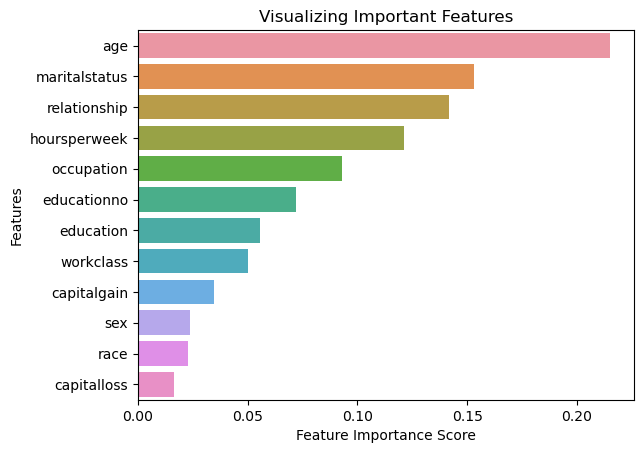

In [143]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [144]:
## Dropping the four columns having least feature importance
df_train.drop(['education','capitalloss','sex','race'],axis=1,inplace=True)

In [145]:
## dropping the same columns from test dataset
df_test.drop(['education','capitalloss','sex','race'],axis=1,inplace=True)

Checking Summary Statistics of numeric dataset

In [146]:
df_train[['age','capitalgain','hoursperweek']].describe()

,age,capitalgain,hoursperweek
count,23269.000000,23269.000000,23269.000000
mean,40.398642,849.139112,42.299712
std,12.631305,6513.206922,12.248378
min,17.000000,0.000000,1.000000
25%,31.000000,0.000000,40.000000
50%,39.000000,0.000000,40.000000
75%,49.000000,0.000000,49.000000
max,90.000000,99999.000000,99.000000


In [147]:
df_test[['age','capitalgain','hoursperweek']].describe()

,age,capitalgain,hoursperweek
count,13450.000000,13450.000000,13450.000000
mean,39.458364,1237.306468,41.158439
std,13.455382,8050.662571,12.417740
min,17.000000,0.000000,1.000000
25%,29.000000,0.000000,40.000000
50%,38.000000,0.000000,40.000000
75%,48.000000,0.000000,45.000000
max,90.000000,99999.000000,99.000000


Standardising the data

In [148]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

# Fitting on train data
scaler.fit(df_train[['age','capitalgain','hoursperweek']])

# Transforming train data
df_train[['age','capitalgain','hoursperweek']]= scaler.transform(df_train[['age','capitalgain','hoursperweek']])

# Transforming test data
df_test[['age','capitalgain','hoursperweek']]= scaler.transform(df_test[['age','capitalgain','hoursperweek']])

In [149]:
## Checking train dataset after standardization

df_train.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,capitalgain,hoursperweek,Salary
0,-0.110731,5,13,4,0,1,0.203416,-0.187760,0
1,0.760140,4,13,2,3,0,-0.130375,-2.392181,0
2,-0.189901,2,9,0,5,1,-0.130375,-0.187760,0
3,0.997651,2,7,2,5,0,-0.130375,-0.187760,0
4,-0.981602,2,13,2,9,5,-0.130375,-0.187760,0


In [150]:
## Checking test dataset after standardization

df_test.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,capitalgain,hoursperweek,Salary
0,-1.219112,2,7,4,6,3,-0.130375,-0.187760,0
1,-0.189901,2,9,2,4,0,-0.130375,0.628692,0
2,-0.981602,1,12,2,10,0,-0.130375,-0.187760,1
3,0.285120,2,10,2,6,0,1.050022,-0.187760,1
4,-0.506581,2,6,4,7,1,-0.130375,-1.004213,0


In [151]:
## Checking output variable of train data
df_train['Salary'].value_counts()

0    11732
1    11537
Name: Salary, dtype: int64

In [152]:
# Splitting train data
X_train=df_train.iloc[:,:-1]
Y_train=df_train.iloc[:,-1]

In [153]:
# Splitting test data
X_test=df_test.iloc[:,:-1]
Y_test=df_test.iloc[:,-1]

In [154]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [155]:
y_pred =  nb.predict(X_test)

In [156]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix1=confusion_matrix(Y_test, y_pred)
conf_matrix1

array([[9490,  603],
       [1844, 1513]], dtype=int64)

Text(20.722222222222214, 0.5, 'True Class')

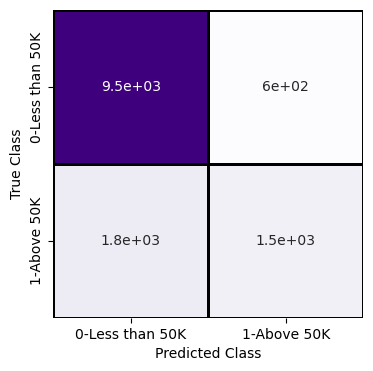

In [157]:
fig, ax= plt.subplots(1,1, figsize=(4,4),dpi=100)

xlabels=['0-Less than 50K','1-Above 50K']
ylabels=['0-Less than 50K','1-Above 50K']

sns.heatmap(conf_matrix1,annot=True, cbar=None, cmap="Purples",xticklabels=xlabels,yticklabels=ylabels,
            linewidths=1,linecolor='black')
ax.set_xlabel('Predicted Class')
ax.set_ylabel('True Class')


In [158]:
from sklearn.metrics import classification_report
names=['0-Less than 50K','1-Above 50K']
print(classification_report(Y_test, y_pred,target_names=names))

                 precision    recall  f1-score   support

0-Less than 50K       0.84      0.94      0.89     10093
    1-Above 50K       0.72      0.45      0.55      3357

       accuracy                           0.82     13450
      macro avg       0.78      0.70      0.72     13450
   weighted avg       0.81      0.82      0.80     13450



#### Model Performance
F1 score is 0.89.

#### Future Scope
There are several algorithms/methods that can be used as alternatives to the nearest neighbors algorithm for distance measurement to improve the accuracy of the model. Some of the most popular ones are:                 
    1. Logistic Regression                           
    2. Random Forest                                  
    3. Linear SVC               
    4. MLP Classifier               
    5. Decision Tree            
    6. KNN                   
The performance of each algorithm depends on the specific problem and dataset being analyzed. Therefore, it is difficult to say which algorithm performs better than the nearest neighbors algorithm in general. However, some of the above algorithms may be more suitable for certain types of data or problems, while others may be better for different types of data or problems. It is important to choose the appropriate algorithm based on the specific requirements of the problem.